## Questions 73 - 96 answers

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 16})  # set font size for plots

### Q73 answer
(a) Using $\psi = x(L - x)$ the denominator integral is $\displaystyle \int \psi^*\psi d\tau=\int_0^L x^2(L-x)^2dx= \frac{L^5}{30}$ and the numerator $\displaystyle \int \psi^*H\psi d\tau=-\frac{\hbar^2}{2m}\int_0^L x(L-x)\frac{d}{dx}x(L-x)dx=2\frac{\hbar^2}{2m}\int_0^L x(L-x)dx=\frac{\hbar^2}{6m}L^3$.

The variational energy is therefore $\displaystyle E =5\frac{\hbar^2}{mL^2}$ which is only slightly larger than the true energy $\displaystyle\frac{\pi^2}{2}\frac{\hbar^2}{mL^2}$ by about $1.4$ %.

(b)The normalisation integral is  $\displaystyle \int \psi^*\psi d\tau=\int_{-L}^L e^{-2ax^2}dx=\sqrt{\frac{\pi}{2a} }$. 

The expectation value $\displaystyle \int \psi^*H\psi d\tau$ the operator has, in the range $\pm L$, the value $\displaystyle H=-\frac{\hbar^2}{2m} \frac{d^2}{dx^2}\psi$ and elsewhere $\displaystyle H=-\frac{\hbar^2}{2m} \frac{d^2}{dx^2}\psi + U\psi$.

Splitting the integral into three parts gives, gives as per eqn 47, $\displaystyle E_V=a \frac{\hbar^2}{2m}+ U\left(1-\mathrm{erf}(L\sqrt{2a})\right) $

In [2]:
a,x,U,hbar,m,L= symbols('a,x,U,hbar,m,L',positive=True)
psi = exp(-a*x**2)
N = integrate(psi**2,(x,-oo,oo))  # normalisation
eqa= psi*( -hbar**2/(2*m)*diff(psi,x,x) + U*psi)  # potential value U
eqb= psi*( -hbar**2/(2*m)*diff(psi,x,x) )         # potential zero 
EV = integrate(eqa,(x,-oo,-L) ) + integrate(eqb,(x,-L,L) ) + integrate(eqa,(x,L,oo) ) 
simplify(EV/N)

Taking the derivative of $E_V$ gives $\displaystyle \frac{dE_V}{dx}=\frac{\hbar^2}{2m}-\frac{LU}{\sqrt{\pi a/2}}e^{-2aL^2}=0$ and solving this for $a$ produces the LambertW function.  

Going back a step and substituting $U=0.5,L=1, \hbar=m=1$ gives $\displaystyle \frac{dE_V}{dx}=\frac{1}{2}-\frac{1}{\sqrt{2\pi a}}e^{-2a}=0$ produces $a=0.2419$ which gives the variation energy as $0.2836$.

![Drawing](integration-fig61a.png) 

Figure 61a. Particle in a finite well. The variational energy $E_V$ and true energy $E_0$ are shown for the only bound state in the well. The wavefunction shown is the variational one leading to $E_V$

_____

### Q74 answer
Using the formula equation 47,  the denominator is $\displaystyle \int\psi^*\psi dx=\int_{-\infty}^\infty \frac{\alpha}{\sqrt{\pi}} e^{-\alpha x^2}dx$ and because of the $e^{-\alpha x^2}$ term an error function is likely to be involved with the integral. To check this we can look up the integral or use Sympy;

In [3]:
alpha,x,hbar,m,k= symbols('alpha,x,hbar,m,k',positive =True)

psi = sqrt(alpha/sqrt(pi))*exp(-alpha*x**2/2)
N = simplify(integrate(psi**2,(x,-oo,oo) ) )      # normalisation integral psi x psi
N

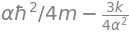

In [4]:
Hpsi = -hbar**2/(2*m)*diff(psi,x,x)- k*x**4*psi  # H x psi 
Enrg = integrate(psi*Hpsi,(x,-oo,oo) )/N           # E = integral psi x H x psi /normalisation
simplify(Enrg)

from which  energy is $\displaystyle E= \frac{\alpha \hbar^2}{4m}-\frac{3k}{4\alpha ^2} $.

The next step is to differentiate this energy wrt $\alpha$ to find the minimum variational energy. Differentiating gives $\displaystyle \alpha^3 = \frac{6mk}{\hbar^2}$ which produces $\displaystyle E=\frac{(72k)^{1/3}}{8}\left( \frac{\hbar^2}{2m} \right)^{2/3}=1.0817 k^{1/3} \left( \frac{\hbar^2}{2m} \right)^{2/3}$ which is a good approximation to the true energy of $\displaystyle 1.060 k^{1/3} \left( \frac{\hbar^2}{2m} \right)^{2/3}$.

### Q75 answer
(a, b) The H atom energy levels are $E_n = -RZ^2/n^2 \mathrm{\,cm^{-1}}$, where $R$ is the Rydberg and $n$ the principal quantum number. The energy is therefore $E_1(He) = -2RZ^2 = -8\times 109737 = -877 896 \mathrm{\,cm^{-1}}$ or $-108.8$ eV.

The energy to ionize He$^+$ is $E_1 = 4R$, or $54.4$ eV which is $4 \times 13.6$ eV the ionization of the H atom. The total experimental energy is $-(54.4 + 24.5) = -79$ eV and the crude theoretical value $-108.8$, which is considerably larger. In (a) it was supposed that the He atom was twice an H atom with no electron-electron interaction or electron-nuclear interaction between opposite atoms; clearly this is wrong. The terms missing are of the form of $\pm e^2/r_{12}$ where $r_{12}$ is the separation between the two electrons or electrons and nuclei.

The equation given in the question allows for electron-electron interaction but not screening of the nuclear charge by the other electron; the variational approach is empirical but should have the effect of reducing the error by changing the effective screening between electrons.

(c) The wavefunction is normalized so that $\int \varphi^*\varphi d\tau =1$ and the expectation value is given in the question for the ground state energy, therefore the only calculation remaining is to find the minimum energy in terms of $\zeta$. This is done by solving

$$\displaystyle \frac{d}{d\zeta}\int \varphi^*H \varphi d\tau = \frac{e^2}{4\pi\epsilon_0a_0}\left( 2\zeta-2Z+\frac{5}{8} \right)=0$$

which gives $\zeta=Z-5/16$. The energy given in the question is $\displaystyle E=\frac{e^2}{4\pi\epsilon_0a_0}\left( \zeta^2-2Z\zeta+\frac{5}{8}\zeta \right)$ which on substituting for $\zeta$ gives the variation result as $\displaystyle E_{var}= \frac{e^2}{4\pi\epsilon_0a_0}\left( Z-\frac{5}{16} \right)^2$ which with $Z=2$ is $\displaystyle E_{var}= \frac{e^2}{4\pi\epsilon_0a_0}\left(\frac{27}{16} \right)^2=-77.5 $ eV.

As a check, using $Z=\zeta = 2$ instead of the variational value gives $\displaystyle E_{var}= -\frac{5}{4}\frac{e^2}{4\pi\epsilon_0a_0} =-34.06$ eV. The improvement in ground state energy due to the variational treatment is therefore from $-34.06$ eV to $-77.5$ eV producing a result close to the experimental value of $-79$ eV and quite a considerable improvement.

### Q76 answer
The expression to be evaluated with $\beta=1$ is $\displaystyle E_V=-\int_{-\infty}^\infty \frac{1}{2}e^{-\alpha x^2/2}\frac{d^2}{dx^2}e^{-\alpha x^2/2} + (1-e^{- x^2})e^{-\alpha x^2/2} dx\bigg/ \int_{-\infty}^\infty e^{-\alpha x^2}dx$. Using sympy to calculate the integrals

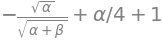

In [5]:
alpha,beta,x = symbols('alpha,beta,x',positive=True)

psi = exp(-alpha*x**2/2)            # wavefunction
N = integrate(psi**2,(x,-oo,oo))    #  normalisation

Hpsi = (-diff(psi,x,x)/2 + (1-exp(-beta*x**2))*psi )
EV   = simplify( integrate(psi*Hpsi,(x,-oo,oo) )/N )    # variational energy
EV

which with $\beta=1$ gives the variational energy as $\displaystyle E_V= 1+\frac{\alpha}{4}-\sqrt{\frac{\alpha}{1+\alpha}}$. The next step step is to find the minimum energy by differentiating by $\alpha$ which gives $\displaystyle \frac{dE_V}{d\alpha}=\frac{(\alpha^{3/2}+\alpha^{1/2})(\alpha+1)^{1/2}-2}{4\sqrt{\alpha}(\alpha+1)^{1/2}} =0$. Solving this using the numerator gives a value of $0.748$

In [6]:
solve( (alpha**(3/2) + alpha**(1/2) )*( alpha +1 )**(1/2)-2,alpha )

This result gives an energy of $E_V=0.53284$. This is close to but a little higher than the numerical solution, which is $0.5226$.  

When $\beta = 1/10$ the potential is wider and the levels lower; the variational value is $0.20522$, which is also a little higher than the numerical value of $0.20473$. Note that an analytical solution is not available, so we have estimated an unknown value but its accuracy is not known unless wavefunctions that are more complex are used and a lower energy obtained. When you look at how to calculate numerical solutions (Chapter 11) you will see how much simpler the variational method is. The numerical value is itself only approximate, but as it is lower than the variational value, we may surmise that it is more accurate. However, the numerical value could be below the true value, there is no guarantee that it is not, unlike the variational answer. Our calculated energies are close to one another, which suggest that both methods have produced reasonably accurate values.

### Q77 answer
Using equations 47 and 60, the denominator in $E_V$ is $N=\displaystyle \int_0^\infty R(r)^2 r^2dr\int_0^\pi \sin(\theta)d\theta\int_0^{2\pi}d\varphi=4\pi\int_0^\infty r^2e^{-\alpha r^2}dr$ and the remaining integral has a standard form producing $\displaystyle N= 4\pi\frac{\sqrt{\pi}}{4\alpha^{3/2}}=\left(\frac{\pi}{\alpha}\right)^{3/2}$.

Th expectation value is $\int \psi H\psi d\tau$ which is $\displaystyle 4\pi\int_0^\infty R(r)\left( -\frac{1}{2r}\frac{d^2}{dr^2}rR(r)-\frac{R(r)}{r} \right) r^2dr$.

Evaluating using $R(r)=e^{-\alpha r^2/2}$ using Sympy gives $\displaystyle E_V = \frac{3\alpha}{4}-2\sqrt{\frac{\alpha}{\pi}}$.

In [7]:
r,alpha =symbols('r,alpha',positive =True)
R  = exp(-alpha*r**2/2)                            # radial wavefunction
eq = 4*pi* R*( -diff(r*R,r,r)/(2*r) - R/r )*r**2   # numerator integral psi H psi     
EV = integrate(eq, (r,0,oo)) /sqrt((pi/alpha)**3) # divide by normalisation N
simplify(EV)

Differentiating wrt $\alpha$ gives $\displaystyle \frac{dE_V}{d\alpha}= \frac{3}{4}-\frac{1}{\sqrt{\alpha\pi}}=0$ from which the minimum $\displaystyle \alpha = \frac{16}{9\pi}$ and the variational energy $\displaystyle -\frac{4}{3\pi}$.

### Q78 answer*
The area is $\displaystyle A=\int_0^1\int_x^{2x} \sin(x+y)dydx$ which evaluates to $\displaystyle A= -\int_0^1 \cos(x+y)\bigg|_x^{2x}dx=\to=-\frac{\sin(3)}{3}+\frac{\sin(2)}{2}=0.408$ and this should be multiplied by $\sigma$ to obtain the total mass. 

The centre of mass is the average weighted with the variation in mass and is 

$$\displaystyle \langle x\rangle=\frac{1}{A}\int_0^1\int_x^{2x} x\sin(x+y)dydx  \qquad  \langle y\rangle=\frac{1}{A}\int_0^1\int_x^{2x} y\sin(x+y)dydx$$

where the $\sigma$ cancels out. Treating $x$ as constant the integral in $y$ gives $\displaystyle \int x\sin(x+y)dy= x\cos(2x)-x\cos(x)$. Integrating this and adding limits gives $\langle x\rangle = 0.275/0.408$. The similar integral $\langle y \rangle = 0.404/0.408$.

The moments of inertia are 

$$\displaystyle I_x=\frac{1}{A}\int_0^1\int_x^{2x} y^2\sin(x+y)dydx  \qquad  I_y=\frac{1}{A}\int_0^1\int_x^{2x} x^2\sin(x+y)dydx$$

and using Sympy gives $I_x= 0.4496; I_y= 0.2027$ and these should be multiplied by $\sigma$.

In [9]:
x,y=symbols('x,y',positive =True)

eq = x**2*sin(x+y)
Iy = integrate(integrate( eq, (y,x,2*x) ), (x,0,1.0) )

eq = y**2*sin(x+y)
Ix = integrate(integrate( eq, (y,x,2*x) ), (x,0,1.0) )
print('{:8.4f}{:8.4f}'.format( Ix,Iy ) )

  0.4496  0.2027


### Q79 answer
The radial part can be separated from the angular part as there is no function with terms such as $r\theta$ and the angular terms are independent of one another. The triple integral is therefore split into the product of three separate integrals. The angular integral between $\psi_{311}$ and $\psi_{310}$ is part $\displaystyle \int_0^{2\pi}e^{-i\varphi}d\varphi \int_0^\pi \cos(\theta)\sin^2(\theta) d\theta$.

This can be evaluated by inspection, because the cosine has a value of $1$ at $\theta = 0$ and $-1$ at $\theta = \pi$ and is 'odd' over the region $0 \to \pi$ therefore the integral is zero. This can be confirmed by direct calculation.

### Q80 answer
The normalization is found using equation 56, and by substitution $\displaystyle N^2\int_0^{2\pi}d\varphi\int_0^\pi\sin^5(\theta)d\theta=1$. The exponential part becomes one because the complex conjugate is formed from $\psi^*\psi$ making the $\varphi$ integral $2\pi$. The integral in $\theta$ can be converted to an exponential and expanded, $\displaystyle \int_0^\pi\sin^5(\theta)d\theta=\frac{16}{15}$. The nromalisation is therefore $N=\sqrt{15/(32\pi)}$.

(b) To test for orthogonality the two different wavefunctions are multiplied and integrated over all space as for normalization. Only the exponential part in $\varphi$ is different so that only this integral need be considered. The result is $\displaystyle \int_0^{2\pi} e^{-2i\varphi^*} e^{2i\varphi} d\varphi =\int_0^{2\pi} e^{4i\varphi}d\varphi=4ie^{4i\varphi}\bigg|_0^{2\pi}=4i(e^{8i\pi}-1)=0$ because for even $n,\; e^{ni\pi} = 1$, therefore the wavefunctions are orthogonal.

### Q81 answer
Rearranging the integral produces $\displaystyle I^2 =\int_0^\infty\int_0^\infty e^{-y^2-x^2}dydx$. Changing the coordinates produces $\displaystyle I^2 =\int_0^{2\pi}\int_0^\infty e^{-r^2}r drd\theta$. This can now be split into two integrals as there is no term in both $r$ and $\theta$ giving $\displaystyle I^2=\frac{\pi}{2}\int_0^\infty e^{-r^2}r dr$. This integral has a standard form making $\displaystyle I=\sqrt{\frac{\pi}{4}}$.

### Q82 answer*
(a) The integral will be $\displaystyle Z = \int_{n=1}^\infty e^{-E_n/k_BT}dn\equiv \int_{n=1}^\infty e^{-an^2}dn$ where the constant $a = h^2/(8mL^2k_BT)$. Using the method of the previous question, $\displaystyle Z^2= \int_0^{\pi/2}\int_0^\infty e^{-ar^2}rdrd\theta$ which evaluates to $\displaystyle Z=\frac{L}{h}\sqrt{2\pi mk_BT}$ making the total partition function $\displaystyle Z^3= \left( \frac{L}{h} \right)^3(2\pi mk_BT)^{3/2}$.

The mass of a benzene molecule is $78 \times 1.66 \cdot 10^{-27}$ kg, the mean free path is $L = k_BT/(\sqrt{2}\sigma^2 p) \approx 100$ nm (with $\sigma = 0.3\cdot10^{-9}$ m and area $\pi\sigma^2$) making the partition function $Z^3 \approx 7 \cdot 10^{11}$.

(b) At the average thermal energy the quantum number is $\approx 17560$, and the energy gap to the next value is $\approx 6 \cdot 10^{-21}$ J. This energy is far larger than expected. The reason is that we used the mean free path, which is small, rather than the size of the container to define $L$. If $L$ were $100$ cm instead of $100$ nm then the energies would be $10^{14}$ times smaller. Assuming that the size of the container determines $L$ seems to be too much of an approximation, as it assumes that the gas molecules do not interact, similarly assuming that $L$ is the mean free path is also not good enough, but for a different reason. The mean free path is an average value and if the exponential distribution of path lengths between collisions was used instead of a single value then small energy gaps are calculated. The distribution of collision distances produces a continuous range of $L$ values and consequently of energies. This range will in effect make the energy levels continuous.

(c) The partition function can then be written as $Q=\alpha T^{3N/2}$ where $\alpha$ is the collection of parameters and constants, $\displaystyle \alpha = \frac{V^N}{N!}\left( \frac{2\pi mk_B}{h^2} \right)^{3N/2}$. The entropy is 

$$\displaystyle S=k_B\left( \frac{\partial \ln(Q)T}{\partial T} \right)_V=k_B\ln(Q)+\frac{k_BT}{Q}\left( \frac{\partial Q}{\partial T} \right)_V=k_B\ln(\alpha)+\frac{3Nk_B}{2}(\ln(T)+1)$$

Using Stirling's approximation $\ln(N!) \approx N\ln(N) - N$ and as the gas is ideal the volume $V = L^3$ should be equal to $Nk_BT/p$ and substituted for $V$ in $\alpha$. Substituting for the constants with the mass $m = 200.59 \,u $ kg ($u$ is the atomic mass unit) and $k_B$ Boltzmann's constant, the translational entropy at $1\,\mathrm{ bar}= 10^5$ Pa and 300K is $S\approx 175\, \mathrm{J\,K^{-1}\, mol^{-1}}$. The equation for $S$ is a version of the Sakur-Tetrode equation.


### Q83 answer
The Jacobian represents the same area or volume element in two different coordinate systems, in this case these are $(x, y)$ and $(u, t)$. A probability of a number being in a region in $(x, y)$ is found by transforming from the original linear coordinates, but because distributions are involved, the chance of being at a given place is changed because the areas enclosed are the same.

(a) the Jacobian determinant is 

$$\displaystyle \frac{\partial (u,v)}{\partial(x,y)}=
\begin{vmatrix} 
\displaystyle\frac{\partial u}{\partial x} &\displaystyle\frac{\partial u}{\partial y} \\
\displaystyle\frac{\partial v}{\partial x} &\displaystyle\frac{\partial v}{\partial y} \\
\end{vmatrix}$$

which means that $u$ and $v$ are required in terms of $x$ and $y$. The ratio of the two equations produces $y=x\tan(2\pi v)$ therefore $2\pi v=\tan^{-1}(y/x)$. Squaring and adding the equations produces $x^2+y^2=-2\ln(u)$ and $u=e^{-(x^2+y^2)/2}$. The differentiations can be performed quite easily as they are standard ones, for example $\displaystyle \frac{d\tan^{-1}(ax)}{dx}=\frac{a}{1+a^2x^2}$. The result is 

$$\displaystyle \frac{\partial (u,v)}{\partial(x,y)}=
\begin{vmatrix} 
\displaystyle -xe^{(x^2+y^2)/2} &\displaystyle -ye^{(x^2+y^2)/2} \\
\displaystyle -\frac{y}{2\pi(x^2+y^2)} &\displaystyle  \frac{x}{2\pi(x^2+y^2)} \\
\end{vmatrix} =\frac{1}{\sqrt{2\pi}}e^{-x^2/2}\frac{1}{\sqrt{2\pi}}e^{-y^2/2} $$

written to make the two distributions clear.

(b) If $(x-\mu)/\sigma$ and $(y-\mu)/\sigma$ are substituted for  $x$ and $y$ respectively and the transform repeated the distribution has the form $\displaystyle \frac{1}{\sqrt{2\pi\sigma} }e^{(x-\mu)^2/2\sigma^2}$ and similarly fro $y$.

### Q84 answer
The Jacobian determinant is

$$\displaystyle \frac{\partial (u,v)}{\partial(\varphi,\theta)}=
\begin{vmatrix} 
\cos(\varphi)\cos(\theta) &-\sin(\varphi)\sin(\theta) \\
\cos(\varphi)\sin(\theta) & \sin(\varphi)\cos(\theta) \\
\end{vmatrix} = \sin(\varphi)\cos(\varphi)$$

which in this case should be inverted when put into the integral giving,

$$\displaystyle \int\int \sqrt{\frac{\sin(\varphi)}{\cos(\theta)} }\cdot\frac{1}{\sin(\varphi)\cos(\varphi)}dudv=\int\int \sqrt{\frac{1}{\cos(\theta)\sin(\varphi)\cos^2(\varphi)} }dudv$$

The substitutions now have to be made. From the definitions of $u$ and $v$, $u^2 + v^2 = \sin^2(\varphi)$ and therefore $\cos^2(\varphi)=1-u^2 -v^2$ and  $\displaystyle \int\int \frac{1}{\sqrt{u}\sqrt{1-u^2-v^2}}dudv$

At this point it is necessary to include the limits and although they could have been added from the start only now are they used. Both lower limits are at zero and therefore also $u = v = 0$. From the definition of the new coordinates $\tan(\theta) = v/u$ and $u^2 + v^2 = \sin^2(\varphi)$. When $\varphi = \pi/2,\, \sin(\varphi) = 1$ and $v$ therefore has values from $0 \to v = 1 - u^2$ and $u$ ranges from $0 \to 1$. The integral in $v$ has a standard form for $\tan^{-1}$ (see Section 2.13) and has to be performed first as the limit contains $v$.

 $$\begin{align}\displaystyle I=&\int_0^1\int_0^{\sqrt{1-u^2}} \frac{1}{\sqrt{u}\sqrt{1-u^2-v^2}}dvdu \\
 =&\int_0^1 \frac{1}{\sqrt{u}}\tan^{-1}\left(\frac{v}{\sqrt{1-u^2-v^2}}\right)\bigg|_0^{v=\sqrt{1-u^2}}du \\
 =&\int_0^1 \frac{1}{\sqrt{u}}du\left(\tan^{-1}(\infty)-\tan^{-1}(0)\right)\\
 =&\pi\end{align}$$

and where $\tan^{-1}(\infty) = \pi/2$ was used.

### Q85 answer
One way of doing the calculation is to differentiate the functions directly in a $3\times 3$ matrix then to calculate the determinant. The calculation is

In [10]:
a,theta,u,v=symbols('a,theta,u,v',positive=True)

fx = a*sqrt((u**2-1)*(1-v**2))*cos(theta)
fy = a*sqrt((u**2-1)*(1-v**2))*sin(theta)
fz = a*u*v

dxu = diff(fx,u)
dxv = diff(fx,v)
dxt = diff(fx,theta)
dyu = diff(fy,u)
dyv = diff(fy,v)
dyt = diff(fy,theta)
dzu = diff(fz,u)
dzv = diff(fz,v)
dzt = diff(fz,theta)

Jac = Matrix([ [dxu, dxv,dxt ],  [dyu, dyv,dyt ], [dzu, dzv,dzt ]  ] )
simplify(Jac.det())

The volume element is therefore $dxdydz = a^3(v^2 - u^22)du dv d\theta$.

### Q86 answer
(a) Because the wavefunctions $\varphi$ are real there is no need to label them as complex conjugates. The calculation is

$$\displaystyle (a\varphi_{2s}e^{iEt/\hbar} +b\varphi_{2p_z}e^{iEt/\hbar} )(a\varphi_{2s}e^{-iEt/\hbar} +b\varphi_{2p_z}e^{-iEt/\hbar})= a^2\varphi_{2s}^2+2ab \varphi_{2s}\varphi_{2p_z}+b^2\varphi_{2p_z}^2$$

and no integration is necessary. 

(b) The product is 

$$\displaystyle P=\left( \frac{\sqrt{3}}{2}\varphi_{1s}e^{iE_{1s}t/\hbar} + \frac{1}{2}\varphi_{2s}e^{iE_{2s}t/\hbar}  \right)\left( \frac{\sqrt{3}}{2}\varphi_{1s}e^{-iE_{1s}t/\hbar} + \frac{1}{2}\varphi_{2s}e^{-iE_{2s}t/\hbar}  \right) = \frac{3}{4}\varphi_{1s}^2 +\frac{\sqrt{3}}{2}\varphi_{1s}\varphi_{2s}e^{i(E_{1s}-E_{2s})t\hbar} +\frac{1}{4}\varphi_{2s}^2$$

A product $\varphi^*\varphi$ which can represent a probability has to be real and the exponential terms can be written as a cosine making the result $\displaystyle P=\frac{3}{4}\varphi_{1s}^2 +\frac{\sqrt{3}}{2}\varphi_{1s}\varphi_{2s}\cos(\Delta \omega t)+ +\frac{1}{4}\varphi_{2s}^2$

which oscillates with a frequency of $\Delta \omega = (E_{2s} - E_{1s})/\hbar$  radians/sec. Both the $\varphi_{1s}$ and $\varphi_{2s}$ wavefunctions are symmetrical about $\pm z$ there can be no dipole formed because $r$, the radial distance is always positive, for example $\varphi_{1s} \sim e^{-r/a_0}$. To prove this only the integral from the cross term needs to be calculated, the normalization terms in front of the wavefunctions are ignored as they only multiply the result by a constant value. 

The change to cylindrical coordinates is also made $r=\sqrt{R^2+z^2}$ where $R$ the radial distance in the $x-y$ plane 

$$\displaystyle \int_0^{2\pi}\int_1^\theta e^{-\sqrt{R^2+z^2}/a_0}\left( 2-\frac{\sqrt{R^2+z^2}}{a_0} \right)e^{-\sqrt{R^2+z^2}/2a_0}R\,dRd\theta \\ = 2\pi\int_1^\theta e^{-3\sqrt{R^2+z^2}/2a_0}\left( 2-\frac{\sqrt{R^2+z^2}}{a_0} \right)R\,dR$$

This integral can be significantly simplified by the substitution $u^2 = R^2 + z^2$ and $du = RdR$. The limits become $0 \to |z|$ (because of the square root) and the other limit remains at infinity. The integral is now $I=\displaystyle 2\pi \int_{|z|}^\infty e^{-3u/2a_0} \left(2-\frac{u}{a_0} \right)udu$ which can be completed by integrating by parts giving $\displaystyle I= \frac{4\pi}{27}(9 u^2-6a_0 u-4a_0^2)e^{-3u/2a_0}\bigg|_{|z|}^\infty=\frac{4\pi}{27}(9 |z|^2-6a_0 |z|-4a_0^2)e^{-3|z|/2a_0}$.

This is an even function because $|z|$ is always positive. When this result is multiplied by $\cos(\Delta \omega t)$ the function will oscillate up and down but the symmetry remains because cosine is an even function and therefore symmetrical about $z=0$ and can never produce an oscillating dipole.

(c) In this case $\displaystyle \psi = \frac{\sqrt{3}}{2}\varphi_{1s}e^{-E_{1s}t\hbar}+\frac{1}{2}\varphi_{2p_z}e^{-iE_{2p_z}t\hbar}$ and again the integral will only have one time-dependent term which is $\displaystyle \int \frac{\sqrt{3}}{2}\varphi_{1s}\varphi_{2p_z}e^{i(E_{1s}-E{2p_z}t/\hbar}d\tau$. Defining $\Delta\omega = (E_{2p_z}- E_{1s})/\hbar$ and taking the real part by changing the exponential to a cosine, adding wavefunctions and limits but ignoring the normalization terms as these are constants, integrating over $\theta$ leaves the integral $\displaystyle 2\pi z\cos(\Delta\omega t)\int_1^\infty e^{-3\sqrt{R^2+z^2}/2a_0}R\,dR$. Using the substitution $u^2 = R^2 + z^2$ as before gives a standard integral 

$$\displaystyle I=\displaystyle 2\pi z\cos(\Delta\omega t)\int_{|z|}^\infty e^{-3u/2a_0}udu = z\frac{4\pi}{9}a_0\cos(\Delta\omega t)(2a_0+3|z|)e^{-3|z|/2a_0}$$

which is an odd function of $z$ and as time progresses, the cosine varies from $-1 \to 1$, and a changing dipole along the z-axis is produced. This means that a radiative transition is possible.

![Drawing](integration-fig62.png)

Figure 62. The cross terms in the integral of a $1s + 2s$ and a $1s + 2p_{z}$ superposition calculated when the cosine term is $1$ and when $-1$. Only in the $1s + 2p_z$ transition is an oscillating dipole produced. ($a_0 = 0.529$ nm)
_____

### Q87 answer
(a) This integral is an overlap integral because the wavefunctions are not functions of the internuclear separation $R$, $\displaystyle \int \varphi_1\frac{q^2}{R}\varphi_2 d\tau =\frac{q^2}{R} \int \varphi_1\varphi_2 d\tau=\frac{q^2}{R}S$

(b) Substituting the prolate spherical coordinates and values for $\rho_1$ etc. into the resonance integral, equation 73, rearranging and simplifying gives 

$$\displaystyle \begin{align} A &= \int \varphi_1\frac{q^2}{r_1}\varphi_2 d\tau 
= \frac{q^2}{\pi a_0^4} \int e^{-\rho_1} \frac{1}{\rho_2}e^{-\rho_2}d\tau \\&
= \rho^3\frac{q^2}{4\pi a_0}\int_0^{2\pi}\int_{-1}^1\int_1^\infty e^{-u\rho}\left( \frac{u^2-v^2}{u+v} \right) dudvd\theta \\&= \rho^3\frac{q^2}{2 a_0}\int_{-1}^1\int_1^\infty e^{-u\rho}\left(u-v \right) dudv   \\&= \frac{q^2}{a_0}\rho(\rho+1)e^{-rho}  \end{align}$$

In [11]:
rho,u,v,q,a0=symbols('rho,u,v,q,a0',positive=True)

eq= exp(-u*rho)*(u-v)
simplify( integrate(  integrate ( q**2*rho**3/(2*a0)*eq, (u,1,oo) ) , (v,-1,1)  ) )

(b) To plot the energies Matplotlib will be used using the results just obtained and those in the text.

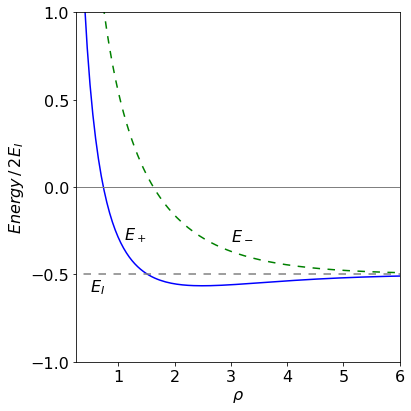

In [12]:
fig=plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 16})  # set font size for plots

a0= 1
q = 1
EI = q*q/(2*a0)
x  = np.linspace(0.1,10,200)           # values along x axis

# define functions for plotting

fA = lambda rho: (q**2*rho + q**2)*np.exp(-rho)/a0    # use f prefix to remind us that its a function
fC = lambda rho: q**2*(-rho + np.exp(2*rho) - 1)*np.exp(-2*rho)/(a0*rho)
fS = lambda rho: (rho**2/3 + rho + 1)*np.exp(-rho)

H11 = lambda rho: -EI + q**2/(a0*rho) - fC(rho)
H12 = lambda rho : fS(rho)*(-EI + q**2/(a0*rho) ) - fA(rho) 

fEplus  = lambda rho: (H11(rho) + H12(rho) )/( 1 + fS(rho) )
fEminus = lambda rho: (H11(rho) - H12(rho) )/( 1 - fS(rho))

plt.plot(x,fEplus(x),color='blue')
plt.plot(x,fEminus(x),color='green',linestyle=(5,(5,5)))

plt.ylim([-1,1])
plt.xlim([0.25,6])

plt.axhline(0,color='grey',linewidth=1)  # horizontal line at zero

plt.yticks([-1,-0.5,0,0.5,1])
plt.xlabel(r'$\rho$')
plt.ylabel(r'$Energy \,/\,2E_I$')
plt.axhline(-EI,color='grey',linestyle=(5,(5,5)))

plt.annotate(r'$E_-$',xy=(3,-0.3))
plt.annotate(r'$E_+$',xy=(1.1,-0.3))
plt.annotate(r'$E_I$',xy=(0.5,-0.6) )
plt.tight_layout()

plt.show()

### Q88 answer
(a) A circle of unit radius $R$ ,has the polar equation $r=R$ then $\displaystyle S=\int_0^{2\pi} Rd\theta=2\pi R$ which is the circumference as integration was around the whole circle.

(b)  As $r=e^{-\theta/a}$ then $dr/d\theta =-e^{-\theta/a}/a$. The arc length becomes 

$$\displaystyle S=\int_0^{2\pi} \sqrt{ e^{-2\theta/a}\left(1+\frac{1}{a^2}\right) }d\theta =\sqrt{ a^2+1 }\left(1-e^{-2\pi/a} \right) $$

(c) Using equation 83 and $dy/dx=\sinh(x)$ gives $\displaystyle S=\int_0^{x_0}\sqrt{1+\sinh^2(x)}dx$. Using the hyperbolic trig identity $\cosh^2(x)-\sinh^2(x)=1$ gives $\displaystyle S=\int_0^{x_0}\cosh(x)dx=\sinh(x_0)$.

(d) $r=a\theta$ and $dr/d\theta=a$  giving $\displaystyle S=a\int_0^{2\pi}\sqrt{1+\theta^2}d\theta =\frac{a}{2}\left(x\sqrt{1+x^2}+\sinh^{-1}(x)\right)\bigg|_0^{2\pi}$ is a standard integral and evaluates to $21.26a$.

### Q89 answer
he ellipse has to be used to define the limits to the calculation. The maximum and minimum $y$ values are $\pm b\sqrt{1 - x^2/a^2}$ and the maximum and minimum $x$ are $\pm a$. Draw out the ellipse if you are not sure of this. The are is 

$$\displaystyle A=\int_{-a}^a\int_{-b\sqrt{1-x^2/a^2}}^{b\sqrt{1-x^2/a^2}}1dydx= 2b \int_{-a}^a \sqrt{1-\frac{x^2}{a^2} }=\pi ab$$

The second integral is standard and is 

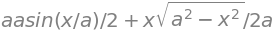

In [13]:
a,b,x,y=symbols('a,b,x,y',positive =True)
eq = sqrt(1-x**2/a**2)
expand( integrate( eq ,x ) )

As a check on the integration, if the ellipse is made into a circle with $a = b$ then $\pi a^2$ would be the area.

The $x$ centroid is 

$$\displaystyle M_x=\frac{1}{A}\int_{-a}^a\int_{-b\sqrt{1-x^2/a^2}}^{b\sqrt{1-x^2/a^2}}x\,dydx=\frac{2b}{A}\int_{-a}^a x\sqrt{1-\frac{x^2}{a^2}} dx=0$$

and integration is unnecessary because it is an odd function integrated between symmetrical limits; see Section 1.3. The $y$ centroid is similarly zero, which means that the 'centre of gravity' of the ellipse is at its origin. much as physical reasoning would dictate.

The $x$ moment of inertia is

$$\displaystyle I_x=\int_{-a}^a\int_{-b\sqrt{1-x^2/a^2}}^{b\sqrt{1-x^2/a^2}}x^2\,dydx=2b\int_{-a}^a x^2\sqrt{1-\frac{x^2}{a^2}} dx= \frac{\pi ba^3}{4}$$

which is symmetric thus the integral and has to be evaluated. The $y$ moment of inertia is calculated by replacing  $x^2$ with $y^2$ giving $I_y = \pi a b^3/4$. The $z$ component is always the sum of the other two.

In [14]:
a,b,x,y,u=symbols('a,b,x,y,u',positive=True)

eq = x**2*sqrt(1-x**2/a**2)
ans = simplify(2*b*integrate(eq,x ) )
ans.subs(x,a)-ans.subs(x,-a)            # do limits manually 

### Q90 answer
The limits to the integration are the same as in the previous question;the area $A$ can be taken from this calculation also. The integration is therefore $\displaystyle \langle r^2 \rangle=\frac{1}{A}\int_{-a}^a\int_{-b\sqrt{1-x^2/a^2}}^{-b\sqrt{1-x^2/a^2}} (x^2+y^2)dydx = \frac{a^2}{4}+\frac{b^2}{4}$. 

In [15]:
a,b,x,y,u=symbols('a,b,x,y,u',positive=True)
eq = (x**2 + y**2)/(pi*a*b)
ans = integrate( integrate( eq, (y,-b*sqrt(1-x**2/a**2),b*sqrt(1-x**2/a**2)  ) )  ,x   ) 
ans0 = simplify(ans)
simplify( ans0.subs(x,a)-ans0.subs(x,-a) )  # do limits manually 

The mean value could represent some physical property such as density or electric field that varies quadratically, as $x^2 + y^2$, over the surface of the ellipse. In principle, any normal surface with any normal functional dependence, could be used; even if the integrals cannot be performed algebraically they can be done so numerically.

### Q91 answer
The curve follows the line $y=xb/a$ and the integral is 

$$\displaystyle \int_C e^x\sin(y)dx+e^x\cos(y)dy =\int_C e^x\sin(y)dx+e^x\cos(y)\frac{dy}{dx}dx=\int_0^a a^x\sin(bx/a)+\frac{b}{a}e^x\cos(bx/a)dx= e^a\sin(b)$$

Using Sympy gives 

In [16]:
a,b,x,=symbols('a,b,x',positive =True)

eq=  exp(x)*(sin(b*x/a) + b*cos(b*x/a)/a )
integrate(eq,(x,0,a)   )

### Q92 answer
(a) In the parametric form the area under a curve is given by equation 80 or $\displaystyle \int y(t)dx = \int y(t) \frac{dx}{dt} dt$. The arch occurs between points where the cycloid is zero or $y = 0$ then $t = 0$ and $y = 0$ again at $t = 2\pi$, therefore the limits on $t$ are $0$ and $2\pi$.

The derivative $\displaystyle \frac{dx}{dt} = a(1 - \cos(t))$ and the integration is $\displaystyle a^2\int_0^{2\pi} (1-\cos(t))^2dt= a^2\int_0^{2\pi}1-2\cos(t)+\frac{1}{2}+\frac{1}{2}\cos(2t)dt =3\pi a^2$.

(b) The arc-length is the integral of a small element $ds$ of the line and is by equation 83; $\displaystyle \int_0^{2\pi}ds =\int_0^{2\pi} \sqrt{\left(\frac{dx}{dt}\right)^2+\left(\frac{dy}{dt}\right)^2}dt$.

Substituting gives $\displaystyle a\int_0^{2\pi} \sqrt{(1-\cos(t))^2+\sin^2(t)}dt=a\int_0^{2\pi} \sqrt{2-2\cos(t)}dt$ which is clearly a complicated integral which, unfortunately,  Sympy completely fails to solve but the result is $8a$. The surprising result is that the point on the circumference travels a distance $8a$ while the wheel travels only the distance $2\pi a$ along the road.

### Q93 answer
(a) Using the equation $\displaystyle S =\int_{x_1}^{x_2}\sqrt{r^2+\left( \frac{dr}{d\theta}\right)^2}d\theta$ the length is $S=\int_0^{2\pi}d\theta=2\pi$, the circumference of a circle of unit radius. The equation $r=1$ defines a unit circle in polar coordinates.

(b) The integral is $\displaystyle S = \sqrt{2}\int_0^{2\pi} e^{-\theta}d\theta=\sqrt{2}(1-e^{-2\theta})$.

(c) $\displaystyle S=\int_{0}^{x_0}\sqrt{1+\sinh^2(x)}dx$. This is not an obvious integral until the relationship $cosh^2(x) - sinh^2(x) = 1$ is recalled, then $\displaystyle S=\int_{0}^{x_0}\cosh(x)dx=\sinh(x_0)$.

### Q94 answer
(a) The derivative is $\displaystyle \frac{df(x)}{dt}=\frac{2x}{2\sqrt{r^2-x^2}}$, substituting and simplifying gives $\displaystyle A=2\pi \int_{-r}^r rdx=4\pi r^2$

(b) The limits are from $x=r\cos(\theta) \to r$ where $\theta$ is $90$ - latitude and is $34^\mathrm{o}$ . The integral evaluates to  

$$\displaystyle 2\pi rx\big|_{r\cos(\theta}^r=2\pi r^2(1-\cos(\theta))$$

and the fraction of the Earth's surface to the north is therefore $(1 - \cos(\theta))/2$ or $22$% approximately.

![Drawing](integration-fig63.png)

figure 63. Defining latitude.
_____

### Q95 answer
(a) Given the same set of conditions, a state variable has the same value and is independent of how those conditions were reached. A state variable is therefore a quantity whose value defines a thermodynamic state. Examples are temperature, pressure, potential energy, internal energy, and entropy.

(b) The first path has a constant temperature, and then constant pressure, the second is a straight-line from the start to the end. The line along which integration is performed is $pV = RT$. Putting the equation in the form of equation 85 gives at constant temperature, $w_T$ and pressure $w_p$,

$$\displaystyle w_T=\int  p\left(  \frac{\partial V}{\partial T}\right)_p\frac{dT}{dp}+ p\left(  \frac{\partial V}{\partial p}\right)_T dp$$

$$\displaystyle w_p=\int  p\left(  \frac{\partial V}{\partial T}\right)_p+ p\left(  \frac{\partial V}{\partial p}\right)_T\frac{dT}{dT} dT$$

The first equation is $\displaystyle w_T=\int  R\frac{dT}{dp}- p\frac{RT}{p^2} dp$, at constant $T$ the pressure change is $p_0$ to $p-1$ then at $T=T_0$ making $dT/dp=0$ and therefore $\displaystyle w_T=-RT_0\int_{p_0}^{p_1} \frac{dp}{p}=-RT_0\ln\left(\frac{p_1}{p_0}\right)$. 

At constant pressure, substituting for the gas laws, gives $\displaystyle w_p=\int R- \frac{RT}{p}\frac{dp}{dT}dT$. As the pressure is constant $dp/dT=0$ then $\displaystyle w_T=R\int_{T_0}^{T_1}dt = R(T_1-T_0)$. The total change is the sum of the two work terms; $\displaystyle w = R(T_1 - T_0) - RT_0\ln\left(\frac{p_1}{p_0}\right)$.

### Q 96 answer
Starting with $\displaystyle S=\int \frac{C_p}{T}dT-\int\left( \frac{\partial V}{\partial T}\right)_pdp $ the first step is to calculate $dV/dT$. The simplest way is to calculate the inverse at constant $p$, which is $\displaystyle R\frac{dT}{dV}= (p+\frac{a}{V^2})-2\frac{a}{V^3}(V-b)$ and then invert the result. The integral is 

$$\displaystyle S=\int \frac{C_p}{T}dT- \frac{RV^3}{V^3p-aV-2ab}dp $$

At constant $T$, $\displaystyle S_T=\int_{T_0}^{T_1} \frac{C_p}{T}\frac{dT}{dp}-\frac{RV^3}{V^3p-aV-2ab}dp$ and as $t$ is constant $dp/dT =0$ then 

$$\displaystyle S_T=-\int_{T_0}^{T_1} \frac{RV^3}{V^3p-aV-2ab}dp = -R\ln\left( \frac{V^3p_1-aV-2ab}{V^3p_0-aV-2ab} \right)$$

At constant pressure the integral is the same as in the text $\displaystyle  S_p=\int_{T_0}^{T_1} \frac{C_p}{T}dT =C_p\ln\left( \frac{T_1}{T_0} \right) $  and the total entropy is the sum of these terms. Notice that this result reverts to that for the ideal gas when $a=b=0$.

The entropy is more negative than that for an ideal gas, making the overall entropy smaller consistent with the presence of intermolecular interactions in the van-der-Waals gas.

In [17]:
a,b,p,V,T,R,p0,p1=symbols('a,b,p,V,T,R,p0,p1',positive=True)

eq= R*V**3/(p*V**3-a*V-2*a*b)
factor(integrate(eq, p ) )